<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span><ul class="toc-item"><li><span><a href="#Drawbacks-of-k-means-Clustering" data-toc-modified-id="Drawbacks-of-k-means-Clustering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Drawbacks of k-means Clustering</a></span></li><li><span><a href="#Gaussian-mixture-model-(GMM)" data-toc-modified-id="Gaussian-mixture-model-(GMM)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian mixture model (GMM)</a></span></li><li><span><a href="#The-Gaussian-Distribution" data-toc-modified-id="The-Gaussian-Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The Gaussian Distribution</a></span></li><li><span><a href="#Gaussian-Mixture-Models" data-toc-modified-id="Gaussian-Mixture-Models-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gaussian Mixture Models</a></span></li><li><span><a href="#Expectation-Maximization-(EM)-Algorithm" data-toc-modified-id="Expectation-Maximization-(EM)-Algorithm-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Expectation-Maximization (EM) Algorithm</a></span></li></ul></li><li><span><a href="#LAB-Assignment" data-toc-modified-id="LAB-Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LAB Assignment</a></span><ul class="toc-item"><li><span><a href="#Exercise-(100-Points)" data-toc-modified-id="Exercise-(100-Points)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise (100 Points)</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Import some libraries</a></span></li><li><span><a href="#Load-Image" data-toc-modified-id="Load-Image-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Load Image</a></span></li><li><span><a href="#Initialize-means,-covariance-matrices-and-mixing-coefficients-of-GMM" data-toc-modified-id="Initialize-means,-covariance-matrices-and-mixing-coefficients-of-GMM-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Initialize means, covariance matrices and mixing coefficients of GMM</a></span></li><li><span><a href="#Implement-GMM-algorithm" data-toc-modified-id="Implement-GMM-algorithm-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Implement GMM algorithm</a></span><ul class="toc-item"><li><span><a href="#E-step" data-toc-modified-id="E-step-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>E-step</a></span></li><li><span><a href="#M-step" data-toc-modified-id="M-step-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>M-step</a></span></li></ul></li><li><span><a href="#Iteration" data-toc-modified-id="Iteration-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Iteration</a></span></li><li><span><a href="#Display" data-toc-modified-id="Display-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#sample-Result" data-toc-modified-id="sample-Result-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>sample Result</a></span></li></ul></li></ul></li></ul></div>

# LAB12 tutorial for Machine Learning <br > Clustering with GMM
> The document description are designed by JIa Yanhong in 2022. Nov. 21th
------

## Objective

- Understand GMM clustering algorithm theory
- Implement the GMM clustering algorithm  from scratch in python
- Complete the LAB assignment.

------

### Drawbacks of k-means Clustering

The k-means clustering concept sounds pretty great, right? It’s simple to understand, relatively easy to implement, and can be applied in quite a number of use cases. But there are certain drawbacks and limitations that we need to be aware of. <font color=red>K-means often doesn't work when clusters are not round shaped</font>

First, KMeans doesn't put data points that are far away from each other into the same cluster, even when they obviously should be because they underly some obvious structure like points on a line, for example.


<div  align="center"> <img src="images/two_lines.png"  width=400 align=center /></div>



Second, KMeans performs poorly for complicated geometric shapes such as the moons and circles shown below.


<div  align="center"> 
<img src="images/noisy_moons_with_true_output.png"  width=400 align=center />
<img src="images/noisy_circles_with_true_output.png"  width=400 align=center />
</div>



In addition,k-means doesn't work when clusters are may overlap.
<div  align="center"> <img src="images/image-20221121170553059.png"  width=200 align=center /></div>


Hence, we need a different way to assign clusters to the data points.  So instead of using a distance-based model, we will now use a distribution-based model.  And that is where `Gaussian Mixture Models` come into this lab!

### Gaussian mixture model (GMM)

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster.

**Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.** 

 Let us take an example that will make it easier to understand.

Here, we have three clusters that are denoted by three colors – Blue, Green, and Cyan. Let’s take the data point highlighted in red. The probability of this point being a part of the blue cluster is 1, while the probability of it being a part of the green or cyan clusters is 0.


<div  align="center"> <img src="images/Screenshot-from-2019-10-21-12-52-06.png"  width=400 align=center /></div>
Now, consider another point – somewhere in between the blue and cyan (highlighted in the below figure). The probability that this point is a part of cluster green is 0, right? And the probability that this belongs to blue and cyan is 0.2 and 0.8 respectively.

<div  align="center"> <img src="images/Screenshot-from-2019-10-21-12-53-29.png"  width=400 align=center /></div>


Gaussian Mixture Models use the soft clustering technique for assigning data points to Gaussian distributions. 

### The Gaussian Distribution

In a one dimensional space, the **probability density function** of a Gaussian distribution is given by:



$$\mathcal{N}(X|\mu, \sigma)=\frac{1}{{\sigma \sqrt {2\pi } }}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$





where μ is the mean and $\sigma^{2}$ is the variance.

The below image has a few Gaussian distributions with a difference in mean (μ) and variance (σ2).


<div  align="center"> <img src="images/gaussians.png"  width=400 align=center /></div>

But this would only be true for a single variable. In the case of two variables, instead of a 2D bell-shaped curve, we will have a 3D bell curve as shown below:

<div  align="center"> <img src="images/gaussians-3d-166902260287820.png"  width=400 align=center /></div>

The probability density function would be given by:



$$\mathcal{N}(X|\mu, \Sigma)= \frac{1}{\sqrt{(2\pi)|\boldsymbol\Sigma|}} \exp\left(-\frac{1}{2}({X}-{\mu})^T{\boldsymbol\Sigma}^{-1}({X}-{\mu}) \right)    $$ 



where $X$ is the input vector, μ is the 2D mean vector, and Σ is the 2×2 covariance matrix. The covariance would now define the shape of this curve. We can generalize the same for d-dimensions.

Thus, this multivariate Gaussian model would have $X$ and $\mu$ as vectors of length d, and Σ would be a *d x d* covariance matrix.

### Gaussian Mixture Models

Suppose there are K clusters (For the sake of simplicity here it is assumed that the number of clusters is known and it is K). So $\mu$ and $ \Sigma$ are also estimated for each k. Had it been only one distribution, they would have been estimated by the **maximum-likelihood method**. But since there are K such clusters and the probability density is defined as a linear function of densities of all these K distributions, i.e.

$$p(\mathbf{x}) =\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\mu_k, \Sigma_k) 
\\
\left\{
\begin{aligned}
&\pi: \text{mixing coefficient}\\
&\pmb{\mu}: \text{means}\\
&\pmb{\Sigma}: \text{covariance matrix}
\end{aligned}
\right.
$$

where $\pi_k$   is the mixing coefficient for k-th distribution.

Assuming that data points are independent, for estimating the parameters by the maximum log-likelihood method, compute $\hspace{0.25 cm} {p( \mathbf{X}|\mu, \Sigma, \pi)}$.


$$ln\ p( \mathbf{X}|\mu, \Sigma, \pi) =\sum_{n=1}^N ln\ p(\mathbf{x}_n) =\sum_{n=1}^N ln {\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)}  $$



Now define a random variable $\gamma_k(\mathbf{x}_n)$ , such that $\gamma_k(\mathbf{x}_n)  =p(k|\mathbf{x}_n)$.
From Bayes’ theorem, 


$$
\gamma_k(\mathbf{x}_n) =\frac{p(\mathbf{x}_n|k)p(k)}{\sum_{k=1}^K p(k)p(\mathbf{x}_n|k)} 
=\frac{p(\mathbf{x}_n|k)\pi_k}{\sum_{k=1}^K \pi_k p(\mathbf{x}_n|k)}
=\frac{\pi_k\mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)}$$

Now for the log-likelihood function to be maximum, its derivative of $p(x_n|\mu, \Sigma, \pi) $ with respect to $\mu$, $\Sigma $ and $\pi $ should be zero. So equating the derivative of $p(x_n|\mu, \Sigma, \pi) $ to zero and rearranging the terms, 


$$\mu_k=\frac{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)\mathbf{x}_n}{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)}$$



Similarly taking derivative with respect to $\Sigma $ and pi respectively, one can obtain the following expressions.

$$\Sigma_k=\frac{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)(\mathbf{x}_n-\mu_k)(\mathbf{x}_n-\mu_k)^T}{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)} \newline $$

And


$$\pi_k=\frac{1}{N} \sum_{n=1}^N \gamma_k(\mathbf{x}_n)$$



**Note:** $\sum_{n=1}^N\gamma_k(x_n) $ denotes the total number of sample points in the k-th cluster. Here it is assumed that there is a total N number of samples and each sample containing d features is denoted by $x_i $.
So it can be clearly seen that the parameters cannot be estimated in closed form. This is where the **Expectation-Maximization algorithm** is beneficial.

### Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm is an iterative way to find maximum-likelihood estimates for model parameters when the data is incomplete or has some missing data points or has some hidden variables. EM chooses some random values for the missing data points and estimates a new set of data. These new values are then recursively used to estimate a better first date, by filling up missing points, until the values get fixed. 
These are the two basic steps of the EM algorithm, namely **E Step or Expectation Step or Estimation Step** and **M Step or Maximization Step**.


- Estimation step (E step):
  - initialize $\mu_k   $, $\Sigma_k   $ and $\pi_k  $ by some random values, or by K means clustering results or by hierarchical clustering results.
  - Then for those given parameter values, estimate the value of the latent variables (i.e $\gamma_k(\mathbf{x}_n)   $)
  $$\gamma_k(\mathbf{x}_n) =\frac{\pi_k\mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)}$$
- Maximization Step(M step):
  - Update the value of the parameters( i.e. $\mu_k    $, $\Sigma_k     $ and $\pi_k    $) calculated using ML method.
  $$\mu_k=\frac{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)\mathbf{x}_n}{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)}$$
  $$\Sigma_k=\frac{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)(\mathbf{x}_n-\mu_k)(\mathbf{x}_n-\mu_k)^T}{\sum_{n=1}^N \gamma_k(\mathbf{x}_n)} \newline $$
  $$\pi_k=\frac{1}{N} \sum_{n=1}^N \gamma_k(\mathbf{x}_n)$$



## LAB Assignment
Please finish the **Exercise**.

In this lab, our goal is to write a program to segment different objects using the **GMM and EM** algorithm. We also use <u>*k-means* clustering algorithm to initialize the parameters</u> of GMM. The following steps should be implemented to achieve such a goal:

1. Load image
2. Initialize parameters of GMM using K-means
3. Implement the EM algorithm for GMM
4. Display result

#### Import some libraries

In [23]:
# Dependency
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
import tqdm

from PIL import Image

COLORS = [
    (255, 0, 0),   # red
    (0, 255, 0),  # green
    (0, 0, 255),   # blue
    (255, 255, 0), # yellow
    (255, 0, 255), # magenta
]



#### Load Image
What you should do is to implement Z-score normalization in `load()`:

In [24]:
import cv2
def load(image_path):
    image = cv2.imread(image_path)
    h, w, c = image.shape

    _mean = np.mean(image, axis=(0, 1))
    _std = np.std(image, axis=(0, 1))
    image_norm = (image - _mean) / _std

    
    return h, w, c, image_norm.reshape(-1, c)

#### Initialize means, covariance matrices and mixing coefficients of GMM
k-means is used to initialize means, covariance matrices and mixing coefficients of GMM

In [25]:
def kmeans(n_cluster, image_pixl):
    kmeans = KMeans(n_clusters=n_cluster)# instantiate a K-means
    labels = kmeans.fit_predict(image_pixl)# fit and get clustering result
    initial_mus = kmeans.cluster_centers_# get centroids
    initial_priors, initial_covs = [], []
    #Followings are for initialization:
    for i in range(n_cluster):
        datas = image_pixl[labels == i, ...].T
        initial_covs.append(np.cov(datas))
        initial_priors.append(datas.shape[1] / len(labels))
    return initial_mus, initial_priors, initial_covs


#### Implement GMM algorithm
We use EM algorithm to refine GMM's parameters.

Although it may be not easy for some students to derive EM formula for GMM, GMM isn't very difficult to implement once you have the formula. Therefore, to help you understand GMM more, there are still some blanks for you to fill in.

<div  align="center"> <img src="images/EM-step.png"  /></div>

##### E-step
It is in `inference()`.

In the following code, `prob` is $\pi_k\mathcal{N}(\mathbf{x}_n|\pmb{\mu}_k,\pmb\Sigma_k)$, `gamma` is  $\gamma$. You need to implement log likelihood and $\gamma$.
```python
def inference(self, datas):
    probs = []
    for i in range(self.ncomp):
        mu, cov, prior = self.mus[i, :], self.covs[i, :, :], self.priors[i]
        prob = prior * multivariate_normal.pdf(datas, mean=mu, cov=cov, allow_singular=True)
        probs.append(np.expand_dims(prob, -1))
    preds = np.concatenate(probs, axis=1)
    
    # TODO: calc log likelihood
    log_likelihood = None

    # TODO: calc gamma
    gamma = None

    return gamma, log_likelihood
```

##### M-step
It is in `update()`

You need to implement mean $\mu$, covariance $\Sigma$ and mixing coefficient $\pi$ .
```python
def update(self, datas, gamma):
    new_mus, new_covs, new_priors = [], [], []
    soft_counts = np.sum(gamma, axis=0)
    for i in range(self.ncomp):
        # TODO: calc mu
        new_mu = None
        new_mus.append(new_mu)

        # TODO: calc cov
        new_cov = None
        new_covs.append(new_cov)

        # TODO: calc mixing coefficients
        new_prior = None
        new_priors.append(new_prior)

    self.mus = np.asarray(new_mus)
    self.covs = np.asarray(new_covs)
    self.priors = np.asarray(new_priors)
```

#### Iteration
Iteration part is as you see in `fit()`
``` python
def fit(self, data, iteration):
    prev_log_liklihood = None

    bar = tqdm.tqdm(total=iteration)
    for i in range(iteration):
        gamma, log_likelihood = self.inference(data)
        self.update(data, gamma)
        if prev_log_liklihood is not None and abs(log_likelihood - prev_log_liklihood) < 1e-10:
            break
        prev_log_likelihood = log_likelihood

        bar.update()
        bar.set_postfix({"log likelihood": log_likelihood})
```

In [26]:
class GMM:
    def __init__(self, ncomp, initial_mus, initial_covs, initial_priors):
        """
        :param ncomp:           the number of clusters
        :param initial_mus:     initial means
        :param initial_covs:    initial covariance matrices
        :param initial_priors:  initial mixing coefficients
        """
        self.ncomp = ncomp
        self.mus = np.asarray(initial_mus)
        self.covs = np.asarray(initial_covs)
        self.priors = np.asarray(initial_priors)

    def inference(self, datas):
        """
        E-step
        :param datas:   original data
        :return:        posterior probability (gamma) and log likelihood
        """
        probs = []
        for i in range(self.ncomp):
            mu, cov, prior = self.mus[i, :], self.covs[i, :, :], self.priors[i]
            prob = prior * multivariate_normal.pdf(datas, mean=mu, cov=cov, allow_singular=True)
            probs.append(np.expand_dims(prob, -1))
        preds = np.concatenate(probs, axis=1)

        log_likelihood = np.sum(np.log(np.sum(preds, axis=1)))

        gamma = preds / np.sum(preds, axis=1, keepdims=True)

        return gamma, log_likelihood

    def update(self, datas, gamma):
        """
        M-step
        :param datas:   original data
        :param gamma:    gamma
        :return:
        """
        new_mus, new_covs, new_priors = [], [], []
        soft_counts = np.sum(gamma, axis=0)
        for i in range(self.ncomp):
            new_mu = np.sum(np.expand_dims(gamma[:, i], -1) * datas, axis=0) / soft_counts[i]
            new_mus.append(new_mu)

            new_cov = np.dot((np.expand_dims(gamma[:, i], -1) * (datas - new_mu)).T, datas - new_mu) / soft_counts[i]
            new_covs.append(new_cov)

            new_prior = soft_counts[i] / len(datas)
            new_priors.append(new_prior)

        self.mus = np.asarray(new_mus)
        self.covs = np.asarray(new_covs)
        self.priors = np.asarray(new_priors)

    def fit(self, data, iteration):
        prev_log_liklihood = None

        bar = tqdm.tqdm(total=iteration)
        for i in range(iteration):
            gamma, log_likelihood = self.inference(data)
            self.update(data, gamma)
            if prev_log_liklihood is not None and abs(log_likelihood - prev_log_liklihood) < 1e-10:
                break
            prev_log_likelihood = log_likelihood

            bar.update()
            bar.set_postfix({"log likelihood": log_likelihood})

#### Display
We use `matplotlib` to display what we segment, you can check the code in `visualize()`

In [27]:
from PIL import Image
import matplotlib.pyplot as plt


def visualize(gmm, image, ncomp, ih, iw):
    beliefs, log_likelihood = gmm.inference(image)
    map_beliefs = np.reshape(beliefs, (ih, iw, ncomp))
    segmented_map = np.zeros((ih, iw, 3))
    for i in range(ih):
        for j in range(iw):
            hard_belief = np.argmax(map_beliefs[i, j, :])
            segmented_map[i, j, :] = np.asarray(COLORS[hard_belief]) / 255.0
    plt.imshow(segmented_map)
    plt.show()

GMM begins...

















































































































































































































































































































































































































































































































































































































































































































































































100%|██████████| 500/500 [00:31<00:00, 15.69it/s, log likelihood=2.15e+5]


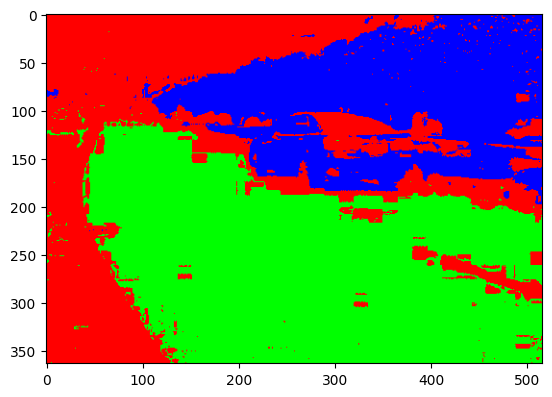

Finish!


In [28]:
ih, iw, ic, image_norm = load("data/original/sample.png")
ncomp = 3
iteration=500
# init mu, prior and cov
initial_mus, initial_priors, initial_covs = kmeans(ncomp, image_norm)

# GMM
print("GMM begins...")
gmm = GMM(ncomp, initial_mus, initial_covs, initial_priors)
gmm.fit(image_norm, iteration)

# visualize
visualize(gmm, image_norm, ncomp, ih, iw)
print("Finish!")

#### sample Result
<img src="images/image-20220804223008133.png" alt="image-20220804223008133" style="zoom:67%;" />
<img src="images/image-20220804222915979.png" alt="image-20220804222915979" style="zoom: 67%;" />